# A. Final Project 2 kelompok 3
---
Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>


# B. Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# C. Data Loading

In [2]:
data = pd.read_csv("D:\\\\semester 6\\proakh\\weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# D. Data Cleaning

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#Mengisi data yang missing value
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum().sum()

0

In [11]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Terdapat missing value pada kolom price sebanyak 343248, maka dari itu dilakukan drop secara menyeluruh

In [12]:
# Show the values of  RainToday column
data["RainToday"].value_counts()

No     43958
Yes    12462
Name: RainToday, dtype: int64

 # E. Explorating Data

## 1. Data Query

In [13]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No
142302,2017-06-24,Darwin,20.2,31.7,0.0,5.6,10.7,ENE,30.0,ENE,...,73.0,32.0,1013.9,1009.7,6.0,5.0,25.4,31.0,No,No


In [14]:
# Menampilkan data query Location Cobar dengan prediksi hujan NO pada 6.0 cloud3pm
data[(data['Location'] == 'Cobar') & (data.RainToday == 'No') & (data.Cloud3pm == 6.0)].head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
6063,2009-01-15,Cobar,25.2,40.5,0.0,16.4,10.3,SW,44.0,W,...,24.0,15.0,1012.4,1009.0,4.0,6.0,31.4,37.8,No,No
6067,2009-01-19,Cobar,21.4,37.5,0.0,14.8,6.9,NNE,43.0,ENE,...,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,No,Yes
6091,2009-02-12,Cobar,14.5,30.1,0.0,9.6,10.0,S,37.0,S,...,44.0,25.0,1013.2,1010.0,6.0,6.0,17.4,28.4,No,No


In [15]:
# Menampilkan Location Darwin dengan prediksi hujan Yes
data[(data['Location'] == 'Darwin') & (data['RainTomorrow'] == 'Yes')].head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139195,2008-09-23,Darwin,23.8,32.5,0.0,7.2,8.3,ESE,39.0,NW,...,64.0,55.0,1014.3,1010.3,4.0,2.0,29.1,30.8,No,Yes
139209,2008-10-07,Darwin,26.7,34.0,0.0,7.6,10.3,S,57.0,E,...,61.0,55.0,1013.3,1008.8,3.0,3.0,30.5,32.6,No,Yes
139216,2008-10-14,Darwin,26.5,34.8,0.0,7.6,8.1,N,41.0,NNW,...,62.0,54.0,1012.5,1008.4,4.0,5.0,30.5,32.6,No,Yes
139217,2008-10-15,Darwin,22.1,34.3,57.6,12.4,5.5,E,102.0,S,...,83.0,48.0,1013.0,1008.2,7.0,6.0,26.9,34.0,Yes,Yes
139219,2008-10-17,Darwin,24.5,30.1,0.4,5.6,1.6,SE,54.0,ENE,...,85.0,75.0,1010.2,1007.5,6.0,7.0,27.6,28.9,No,Yes


## 2. Data Grouping

In [16]:
lc = data['Location'].unique()
print(lc)

['Cobar' 'CoffsHarbour' 'Moree' 'NorfolkIsland' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Canberra' 'Sale' 'MelbourneAirport'
 'Melbourne' 'Mildura' 'Portland' 'Watsonia' 'Brisbane' 'Cairns'
 'Townsville' 'MountGambier' 'Nuriootpa' 'Woomera' 'PerthAirport' 'Perth'
 'Hobart' 'AliceSprings' 'Darwin']


In [17]:
ct = data['WindDir3pm'].unique()
print(ct)

['SW' 'SSE' 'NNW' 'WSW' 'WNW' 'S' 'ENE' 'N' 'SE' 'NNE' 'NW' 'E' 'ESE' 'NE'
 'SSW' 'W']


In [18]:
# Group Data mencari nilai wilayah dengan curah hujan tertinggi pada WindDir3pm
# Grouping dengan fitur Rainfall
gp1 = data.groupby(['Location', 'WindDir3pm'])['Rainfall'].sum()
print(gp1)

Location      WindDir3pm
AliceSprings  E             213.2
              ENE           189.0
              ESE           352.8
              N              81.0
              NE             83.4
                            ...  
Woomera       SSW           112.9
              SW            152.8
              W             125.2
              WNW            40.8
              WSW            61.4
Name: Rainfall, Length: 416, dtype: float64


In [19]:
#Membandingkan wilayah dengan Temperature paling tinggi adalah Woomera
data.groupby(by=["Location"]).agg({'MaxTemp' : 'max'})

,MaxTemp
Location,
AliceSprings,44.9
Brisbane,38.9
Cairns,38.6
Canberra,40.0
Cobar,45.4
CoffsHarbour,37.7
Darwin,38.0
Hobart,38.3
Melbourne,46.4


In [20]:
#Melihat wilayah dengan Temperature paling rendah adalah Canberra
data.groupby(by=["Location"]).agg({'MinTemp' : 'min'})

,MinTemp
Location,
AliceSprings,-5.2
Brisbane,2.6
Cairns,9.3
Canberra,-6.7
Cobar,0.0
CoffsHarbour,0.6
Darwin,12.5
Hobart,0.3
Melbourne,2.3


## 3. Variability

In [21]:
# Variance
var = np.var(data['Rainfall'], ddof=1)
print("Variance dari Rainfall: ", var)
# Standard Deviation
std = np.std(data['Rainfall'], ddof=1)
print("Standard Deviasi dari Rainfall: ", std)
# Skewness
s = data['Rainfall']
s.skew()
print("Skewness: ", s.skew())
# Ranges
range = np.ptp(s)
print("Range: ", range)

Variance dari Rainfall:  49.207730890421665
Standard Deviasi dari Rainfall:  7.014822227998487
Skewness:  7.502521474120267
Range:  206.2


## 4. Central Tendency

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [23]:
# Mencari Nilai Rata-rata dari Rainfall
mean = data['Rainfall'].mean()
mean

2.1303970223325064

In [24]:
# Mencari Nilai Tengah dari Evaporation
median = data['Evaporation'].median()
print(median)

5.0


In [25]:
# Mencari nilai modus dari MinTemp
mode = data['MinTemp'].mode()
print(mode)

0    13.0
Name: MinTemp, dtype: float64


In [26]:
# Mencari nilai modus dari MaxTemp
mode = data['MaxTemp'].mode()
print(mode)

0    19.6
Name: MaxTemp, dtype: float64


## 5. Visualiasasi

([<matplotlib.patches.Wedge at 0x2f487212b80>,
 [Text(1.0840502345854015, 0.18664160547781458, 'Darwin'),
  Text(0.9603211809483616, 0.5364543125205951, 'Perth'),
  Text(0.7323187825534312, 0.8207979049190248, 'Brisbane'),
  Text(0.42934063637292125, 1.0127520021994008, 'MelbourneAirport'),
  Text(0.08316000028342221, 1.096852047613014, 'PerthAirport'),
  Text(-0.26823984258511285, 1.0667930384333757, 'SydneyAirport'),
  Text(-0.5825879229742879, 0.9330548279734184, 'Watsonia'),
  Text(-0.8297472718943132, 0.7221630458448736, 'Mildura'),
  Text(-0.9977939597480596, 0.46304126586114097, 'MountGambier'),
  Text(-1.0859446119337646, 0.17528348413933825, 'NorfolkIsland'),
  Text(-1.0929525208053563, -0.12431728465992722, 'Cairns'),
  Text(-1.019874199054776, -0.4121366497927351, 'Townsville'),
  Text(-0.8735145489107956, -0.668559894729836, 'WaggaWagga'),
  Text(-0.673752435738959, -0.8695157591072286, 'AliceSprings'),
  Text(-0.45218010124482866, -1.0027627615932977, 'Nuriootpa'),
  Text(

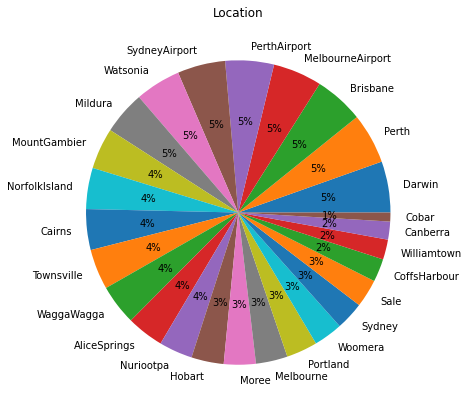

In [27]:
# Menampilkan wilayah dengan curah hujan tinggi dengan pie chart
plt.figure(figsize=(7,7))
plt.title('Location')
plt.pie(
    data['Location'].value_counts(),
    labels=list(data['Location'].value_counts().index),
    autopct ='%1.f%%'
)

<AxesSubplot:title={'center':'WindGustSpeed'}, xlabel='WindGustSpeed', ylabel='Count'>

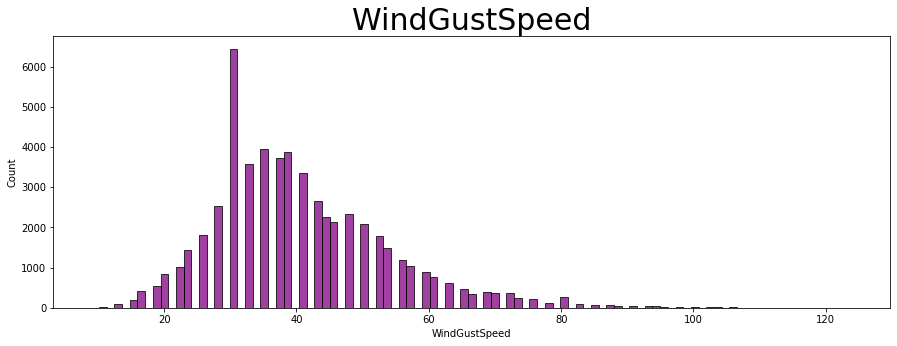

In [28]:
#show distribution of WindGustSpeed
bins = np.linspace(data['WindGustSpeed'].min(),data['WindGustSpeed'].max(),100)
count=data['WindGustSpeed'].value_counts()
plt.figure(figsize=(15,5))
plt.title('WindGustSpeed',fontsize=30)
sns.histplot(x='WindGustSpeed',data=data,bins=bins, color='purple')

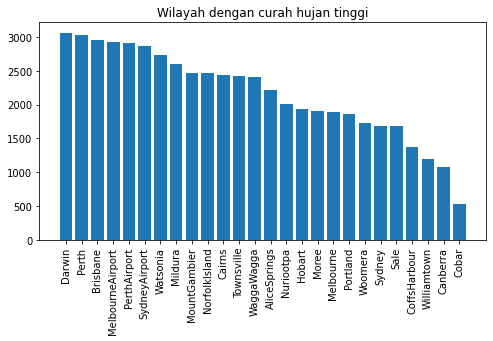

In [29]:
# visualisasi Wilayah dengan curah hujan tinggi
plt.figure(figsize=[8,4])
plt.bar(data['Location'].value_counts().index, data['Location'].value_counts())
plt.xticks(rotation=90)
plt.title('Wilayah dengan curah hujan tinggi')
plt.show()

# Preprocessing

Sebelumnya kita akan menambahkan 1 kolom baru yaitu AvgTemp, yang merupakan gabungan dari MinTemp dan MaxTemp. Kemudian dihapus kolom MinTemp dan MaxTemp. Dengan adanya kolom AvgTemp ini, maka kita dapat melihat secara sekaligus MinTemp dan MaxTemp dalam 1 kolom saja sehingga representasi dataset terlihat lebih efektif. Setelah itu, dilakukan proses feature selection, disini kita akan mencoba untuk membuat corr map untuk melihat korelasi antar setiap atribut dengan atribut prediktor yaitu RainTommorow. 

In [63]:
# As we can see the first four columns have less than 60% data, we can ignore these four columns
# We don't need the location column because 
# we are going to find if it will rain in Australia(not location specific)
# We are going to drop the date column too.
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
df = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(56420, 17)

In [64]:
#Let us get rid of all null values in df
df = df.dropna(how='any')
df.shape

(56420, 17)

In [65]:
#its time to remove the outliers in our data - we are using Z-score to detect and remove the outliers.
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
6049    0.691208  1.575298  0.303702       0.534126      1.162355   
6050    0.769131  0.671504  0.303702       0.290764      0.400721   
6052    0.924976  1.919600  0.303702       0.384146      1.723325   
6053    1.314588  2.034368  0.303702       0.740704      1.162355   
6054    1.673032  2.407362  0.303702       0.440744      0.160248   
...          ...       ...       ...            ...           ...   
142298  0.909391  1.317071  0.303702       0.440744      0.801645   
142299  1.205497  1.202303  0.303702       0.290764      0.320699   
142300  1.127574  1.230995  0.303702       0.590724      0.160248   
142301  0.940560  1.087536  0.303702       1.115654      0.801645   
142302  1.049652  1.073190  0.303702       0.815694      0.080225   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6049        0.025055     2.477924     1.812261     1.583303     1.513002   
6050        0.09245

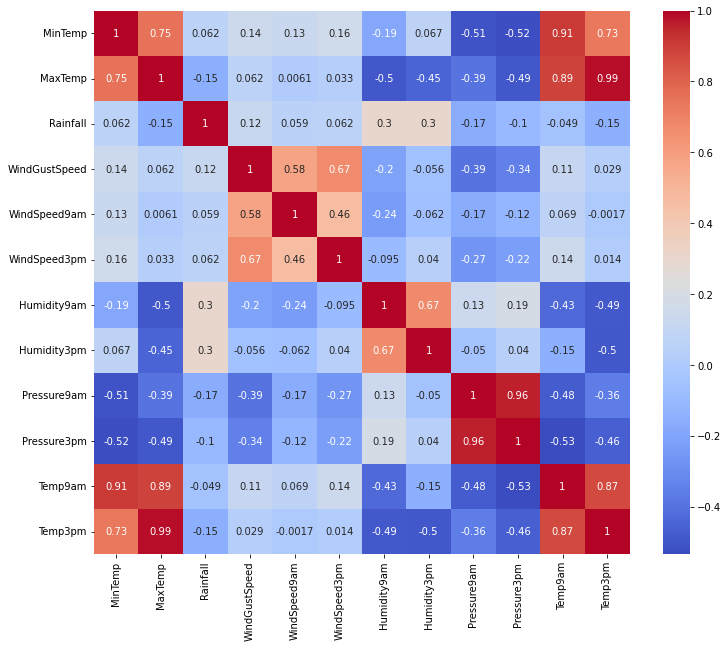

In [66]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

In [67]:
# Mengubah yes/no ke 1/0 pada RaiToday and RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# Melihat unique values dan mengkonversi ke integer menggunakan pd.get_dummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6054,24.2,41.0,0.0,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,...,0,1,0,0,0,0,0,0,0,0
6055,27.1,36.1,0.0,43.0,7.0,20.0,26.0,19.0,1007.7,1007.4,...,0,0,0,0,0,0,0,0,0,0
6056,23.3,34.0,0.0,41.0,17.0,19.0,33.0,15.0,1011.3,1009.9,...,0,0,1,0,0,0,0,0,0,0
6057,16.1,34.2,0.0,37.0,15.0,6.0,25.0,9.0,1013.3,1009.2,...,0,0,0,1,0,0,0,0,0,0
6058,19.0,35.5,0.0,48.0,30.0,9.0,46.0,28.0,1008.3,1004.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#next step is to standardize our data - using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6054,0.824022,0.902200,0.0,0.366197,0.405405,0.261905,0.089888,0.15,0.342233,0.320388,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6055,0.905028,0.782396,0.0,0.478873,0.135135,0.428571,0.168539,0.19,0.269417,0.320388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6056,0.798883,0.731051,0.0,0.450704,0.405405,0.404762,0.247191,0.15,0.356796,0.381068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6057,0.597765,0.735941,0.0,0.394366,0.351351,0.095238,0.157303,0.09,0.405340,0.364078,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6058,0.678771,0.767726,0.0,0.549296,0.756757,0.166667,0.393258,0.28,0.283981,0.237864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6059,0.698324,0.767726,0.0,0.450704,0.351351,0.357143,0.561798,0.14,0.274272,0.281553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Setelah berhasil melakukan pre-processing, selanjutnya memilih fitur important pada RainTomorrow
# Menggunakan SelectKBest untuk mengambil top fitur 
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [70]:
#Let's get hold of the important features as assign them as X
df = df[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = df[['Humidity3pm']] # let's use only one feature Humidity3pm
y = df[['RainTomorrow']]

# Modeling

In [88]:
from sklearn.metrics import roc_auc_score

## 1. Logistic Regression

In [71]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [72]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [89]:
y_pred = LR.predict(X_test)
score = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [90]:
print("roc_auc_score: ", roc_auc)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

roc_auc_score:  0.6515223870274712
Accuracy : 0.8359567325624767
Time taken : 115.9026665687561


## 2. RandomForestClassifier

In [75]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [76]:
RF = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
RF.fit(X_train,y_train)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3288\3072541246.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestClassifier(max_depth=4, random_state=0)

In [91]:
y_pred1 = RF.predict(X_test)
score = accuracy_score(y_test,y_pred1)
roc_auc = roc_auc_score(y_test,y_pred1)

In [92]:
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)
print("roc_auc_score: ", roc_auc)

Accuracy : 0.8359567325624767
Time taken : 155.65259170532227
roc_auc_score:  0.6515223870274712


## 3. DecisionTree

In [79]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [80]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [93]:
y_pred = DT.predict(X_test)
score = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [94]:
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)
print("roc_auc_score: ", roc_auc)

Accuracy : 0.8359567325624767
Time taken : 192.24051475524902
roc_auc_score:  0.647310267923346


## 4. SupportVectorMachine(SVM)

In [83]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [84]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [95]:
y_pred = SVM.predict(X_test)
score = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

In [96]:
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)
print("roc_auc_score: ", roc_auc)

Accuracy : 0.8337187616560985
Time taken : 210.94625401496887
roc_auc_score:  0.6356292004577194


# Kesimpulan

In [98]:
# Menampilkan hasil test score dari LogisticRegression, RandomForest, DecisionTree, dan SVM 
print('LogisticRegression Test Score    : ' , LR.score(X_test, y_test))
print('RandomForest Test Score          : ' , RF.score(X_test, y_test))
print('DecisionTree Test Score          : ' , DT.score(X_test, y_test))
print('SupportVectorMachine Test Score  : ' , SVM.score(X_test, y_test))


LogisticRegression Test Score    :  0.8359567325624767
RandomForest Test Score          :  0.8359567325624767
DecisionTree Test Score          :  0.8359567325624767
SupportVectorMachine Test Score  :  0.8337187616560985


Setelah melakukanBerdasarkan model diatas dapat ditarik kesimpulan bahwa 4 model memiliki nilai prediksi tidak jauh berbeda. Namun, nilai prediksi dari model LogisticRegression lebih baik dari 3 model lainnya. Jadi untuk